<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/pandas/pandas_series_lectyre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Create Series

Pandas Series - одномерный массив элементов, подобный одномерному numpy массиву, в котором помимо чисел могут содержатся строчные элементы.

Сгенерим несколько серий используя функцию Series()

In [ ]:
my_list = [i for i in range(21)]


In [ ]:
s_1

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
dtype: int64

In [ ]:
s_1.dtype

dtype('int64')

In [ ]:
s_1.shape

(21,)

In [ ]:
# сгенерим серию с строками
my_str = 'Однажды в студеную зимнюю пору я из лесу вышел был сильный мороз.'
my_list = my_str.split()
s_2 =

In [ ]:
#s_2[1] = 'kjkjhkdf'
#s_2[15] = 'sdkjshk'
ind = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
# посмотрите тип и размер

In [ ]:
s_2.reindex([8, 7, 6, 15])

8       из
7        я
6     пору
15     NaN
dtype: object

In [ ]:
s_2[2] = 'kjsdkj'
s_2[15] = 'kjhkjhfkjsdlfjshklf'
s_2

0                 Однажды
1                       в
2                  kjsdkj
3                  зимнюю
4                    пору
5                       я
6                      из
7                    лесу
8                   вышел
9                     был
10                сильный
11                 мороз.
15    kjhkjhfkjsdlfjshklf
dtype: object

Сгенерим серию из словаря. Мудрить с индексами не будем.

In [ ]:
key = [i for i in range(11)]
my_str = 'ansmdkfhgir'
val = [i for i in my_str]
my_dict = {k:v for k, v in zip(key, val)}

0     a
1     n
2     s
3     m
4     d
5     k
6     f
7     h
8     g
9     i
10    r
dtype: object

# Notnull as Bool Masks

Функционал фильтрации в панде полностью аналогичен нампаевскому

In [ ]:
s_3 = pd.Series([1, 2, 3, np.nan, 5, 6, np.nan])
s_3[s_3.notnull()]

,0
0,1.0
1,2.0
2,3.0
4,5.0
5,6.0


# Mat Operations

Сгенерим серию рандомных чисел и уменьшим все ее значения на 30%

In [ ]:
s_4 = pd.Series(np.random.randint(1, 50, 20))

In [ ]:
s_4

,0
0,2
1,20
2,17
3,11
4,28
5,6
6,1
7,15
8,15
9,28


In [ ]:
s_4.values * 0.7

array([ 1.4, 14. , 11.9,  7.7, 19.6,  4.2,  0.7, 10.5, 10.5, 19.6,  7. ,
       15.4, 22.4, 32.9,  5.6,  3.5,  9.1,  2.1, 22.4, 25.9])

# isin()

Данная функция проверяет ихождение элемента или элементов одной серии в другую серию.

In [ ]:
s_4.head(6)

,0
0,2
1,20
2,17
3,11
4,28
5,6


In [ ]:
s_4[s_4.isin([1, 2, 3, 4, 5])]

,0
0,2
6,1
15,5
17,3


In [ ]:
s_ = np.random.randint(1, 50, 20)
s_5 = pd.Series(s_)
s_5[s_5.isin(s_4)]

,0
3,5
4,32
7,8
11,28
17,10
18,22


# Фильтрация и чистка данных

Создадим серию, и выкинем все, что откланяется более чем на одну сигму (стандартное отклонение)

Метод values позволяет посмотреть содержимое серии в более компактном виде без индексов

In [ ]:
s_4 = pd.Series(np.random.rand(40)*10)
s_4.values

array([1.34866651, 6.44275307, 9.27011498, 4.38860437, 1.46285448,
       9.3923654 , 0.80963904, 9.36336084, 8.91390423, 2.16770486,
       3.23467349, 5.20142854, 8.42213057, 0.69899873, 3.98716193,
       6.8283184 , 7.88367914, 4.92353388, 8.25767703, 3.54753584,
       5.80164854, 3.94364006, 7.83002361, 6.63072695, 6.30354647,
       6.76237538, 8.3354589 , 2.26374372, 7.26628059, 3.94691444,
       4.4965098 , 4.75705149, 8.49747765, 4.78889717, 0.21402657,
       1.37030792, 2.29978393, 6.56936758, 5.77742096, 4.68264802])

In [ ]:
shape_1 = s_4.shape[0] # проверим размер
shape_1

20

In [ ]:
std = s_4.std()
mean = s_4.mean()

In [ ]:
mask_1 = s_4 > mean-std
mask_2 = s_4 < mean+std  #создали маски для всех элементов, относительно отклонения от среднего на 1 сигму

In [ ]:
s_4[mask_1 & mask_2].values

array([6.44275307, 4.38860437, 3.23467349, 5.20142854, 3.98716193,
       6.8283184 , 7.88367914, 4.92353388, 3.54753584, 5.80164854,
       3.94364006, 7.83002361, 6.63072695, 6.30354647, 6.76237538,
       7.26628059, 3.94691444, 4.4965098 , 4.75705149, 4.78889717,
       6.56936758, 5.77742096, 4.68264802])

In [ ]:
display(mask_1.values, mask_2.values)

array([False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True])

array([ True,  True, False,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
s_4 = s_4[mask_1 & mask_2] # пересохраним серию после отделения элементов из нужного диапозона
s_4.values

array([6.44275307, 4.38860437, 3.23467349, 5.20142854, 3.98716193,
       6.8283184 , 7.88367914, 4.92353388, 3.54753584, 5.80164854,
       3.94364006, 7.83002361, 6.63072695, 6.30354647, 6.76237538,
       7.26628059, 3.94691444, 4.4965098 , 4.75705149, 4.78889717,
       6.56936758, 5.77742096, 4.68264802])

In [ ]:
shape_2 = s_4.shape[0]

In [ ]:
# сравним длины того что было и того что стало
display(shape_1, shape_2)

20

23

In [ ]:
shape_1/shape_2

0.8695652173913043

<Axes: ylabel='Count'>

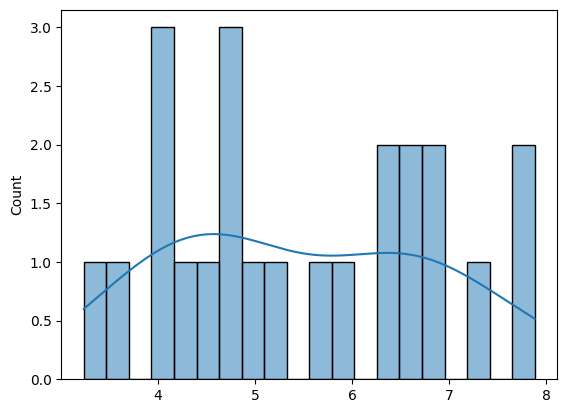

In [ ]:
import seaborn as sns
sns.histplot(s_4, kde=True, bins=20)

Создадим 2 серии и выполним их сумму.

In [ ]:
a = pd.Series(np.random.randint(1, 50, 10))
b = pd.Series(np.random.randint(1, 50, 15))

In [ ]:
a, b

(0    40
 1    49
 2    15
 3    10
 4    30
 5    30
 6    20
 7    28
 8    48
 9    16
 dtype: int64,
 0     41
 1     27
 2     14
 3     17
 4     26
 5      6
 6      4
 7      3
 8     26
 9     11
 10    39
 11    27
 12    47
 13    37
 14    15
 dtype: int64)

In [ ]:
c = a + b

In [ ]:
c

,0
0,81.0
1,76.0
2,29.0
3,27.0
4,56.0
5,36.0
6,24.0
7,31.0
8,74.0
9,27.0


In [ ]:
c = b>a
c

ValueError: Can only compare identically-labeled Series objects

In [ ]:
test1 = pd.Series([1, 2, 3], index = [1, 2, 3])
test2 = pd.Series([1, 2, 3])


In [ ]:
test1 == test2
# несмотря на размер, выдает ошибку. Потому что индексы разные

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# уберем NaN
c = c[c.notnull()].astype(int)
c

,0
0,81
1,76
2,29
3,27
4,56
5,36
6,24
7,31
8,74
9,27


In [ ]:
c.notnull()

,0
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


Как добавить в серию элемент?

Можно обратиться по существующему элементу и переприсвоить туда новое значение.

Если обратиться по не несуществующему индексу и добавить туда значение, то появится в серии новый элемент.

In [ ]:
s = pd.Series([1, 2, 3, 4])
s

,0
0,1
1,2
2,3
3,4


In [ ]:
s[3] = 9789 # заменили элемент под индексом 3

In [ ]:
s_1 = s[:2].copy()
s_1

,0
0,1
1,2


In [ ]:
s_1[0] = 10000000

In [ ]:
s_1

,0
0,10000000
1,2


In [ ]:
s[10] = 1000
s

,0
0,1
1,2
2,3
3,9789
10,1000


In [ ]:
s

,0
0,1
1,2
2,3
3,9789
10,1000


In [ ]:
s.add(pd.Series([5, 6, 8], index = [5, 6, 8]))

,0
0,NaN
1,NaN
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN
10,NaN


In [ ]:
s_2 = pd.Series([2, 3, 4, 5], index=['a', 'b', 'c', 'd'])
s_2['a'].item() # вытащим элемент под индексом 'a'

2

In [ ]:
s_2['h'] = 10000 # сщздадим новое значение под индексом 'h'
s_2

,0
a,2
b,3
c,4
d,5
h,10000


In [ ]:
print('ll')

ll


In [ ]:
# сгенерим серию с строками
my_str = 'Однажды в студеную зимнюю пору я из лесу вышел был сильный мороз.'
my_list = my_str.split()
s_2 = pd.Series(my_list)
s_2

,0
0,Однажды
1,в
2,студеную
3,зимнюю
4,пору
5,я
6,из
7,лесу
8,вышел
9,был


In [ ]:
s_2.str.lower().str.replace('о','%')

,0
0,%днажды
1,в
2,студеную
3,зимнюю
4,п%ру
5,я
6,из
7,лесу
8,вышел
9,был


In [ ]:
test  = pd.Series([str(i) + ' сом' for i in range(100, 110)])
test

,0
0,100 сом
1,101 сом
2,102 сом
3,103 сом
4,104 сом
5,105 сом
6,106 сом
7,107 сом
8,108 сом
9,109 сом


In [ ]:
test = test.str.replace(' сом', '').astype(int)
test

,0
0,100
1,101
2,102
3,103
4,104
5,105
6,106
7,107
8,108
9,109


In [ ]:
test.dtype

dtype('int64')

In [ ]:
test_2 = test.copy()

In [ ]:
test_2[10] = 109.9

In [ ]:
test_2[11] = 'hi'

In [ ]:
test

,0
0,100
1,101
2,102
3,103
4,104
5,105
6,106
7,107
8,108
9,109


In [ ]:
test_2

,0
0,100.0
1,101.0
2,102.0
3,103.0
4,104.0
5,105.0
6,106.0
7,107.0
8,108.0
9,109.0


In [ ]:
test_2.astype(str).str.replace('10', '10 + ')

,0
0,10 + 0.0
1,10 + 1.0
2,10 + 2.0
3,10 + 3.0
4,10 + 4.0
5,10 + 5.0
6,10 + 6.0
7,10 + 7.0
8,10 + 8.0
9,10 + 9.0
